In [ ]:
#!pip install --upgrade qiskit

In [3]:
from qiskit import IBMQ
IBMQ.save_account('paste ur id here',overwrite=True)

In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-19 12:22:31,547: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [7]:
#!pip install qiskit-machine-learning

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [9]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [12]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
boston_dataset.target = boston['CHAS']

In [15]:
boston['MEDV']=boston_dataset.target

# Data preprocessing

In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [28]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y= boston['MEDV']
#Y=pd.DataFrame(np.c_[boston['MEDV']],columns=['MEDV'])

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [36]:
X_train

array([[ 5.89601608e+00,  2.48915737e-01],
       [-9.39660127e+00, -1.09616369e+00],
       [ 8.14754494e+00, -1.37159107e-01],
       [-3.38274062e+00,  3.63524326e-01],
       [ 7.81236040e+00, -5.65598509e-01],
       [-9.12700399e+00,  1.84620378e+00],
       [-5.03242633e+00,  4.16449321e-01],
       [ 2.37310771e-01,  1.30396940e+00],
       [-5.31271158e+00, -1.02295491e-01],
       [-8.09000062e-01,  3.54549765e-01],
       [ 4.62378435e+00, -4.49100336e-01],
       [-3.90870418e+00, -5.94823904e-01],
       [ 5.22219770e+00, -6.67863838e-01],
       [ 1.53057251e+01, -7.22638293e-01],
       [ 1.53881960e+00,  5.96978764e-01],
       [ 6.32635824e+00, -1.05409849e-01],
       [ 4.63066442e+00,  1.82770968e-02],
       [ 6.18996191e-02,  6.93043112e-01],
       [-3.16434971e+00,  5.03200424e-01],
       [-6.06315883e+00, -7.84281506e-01],
       [-5.71980999e+00,  3.07786064e-01],
       [-1.44807809e-02,  5.84254168e-01],
       [-4.02465208e+00,  5.22689893e-01],
       [-4.

In [37]:
y=Y_train.to_numpy()

In [54]:
y

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
len(y)

404

In [42]:
from sklearn.decomposition import PCA
n=2
pca = PCA(n_components=n).fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

print("Size of traaining",len(X_train))
print("Size of test",len(X_test))

Size of traaining 404
Size of test 102


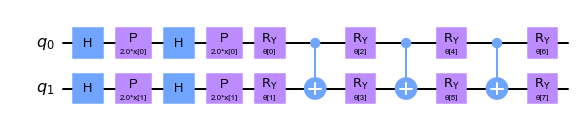

In [43]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap,ZFeatureMap,TwoLocal,EfficientSU2
qc = QuantumCircuit(n)
feature_map = ZFeatureMap(n)
ansatz = RealAmplitudes(n)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.decompose().draw(output='mpl')

In [44]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [45]:
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B,ADAM,SPSA
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=20),
    callbackgraph=callbackgraph,
)

In [46]:
yt=Y_test.to_numpy()

In [55]:
yt

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

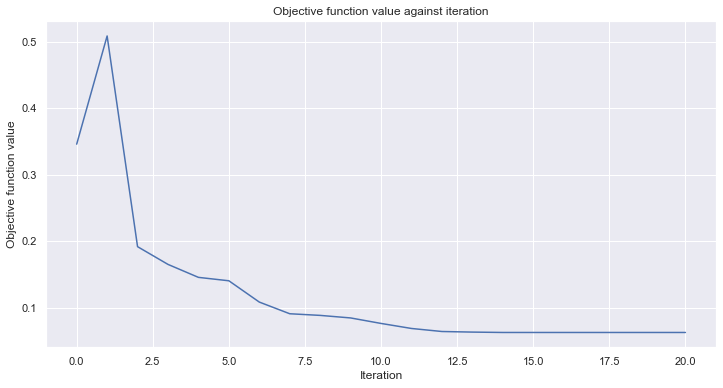

In [47]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X_test, yt)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
#vqr.score(X_train, y)

In [48]:
vqr.score(X_test, yt)

0.01422354183508201

In [49]:
labels_test = vqr.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_test, yt)

0.06300858753168691

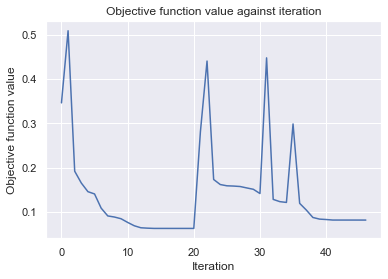

-0.2685750370373221

In [51]:
vqr.fit(X_train, y)
vqr.score(X_train, y)

In [52]:
labels_test = vqr.predict(X_train)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(labels_test, y)

0.08182750459470226